# Histograms, Binnings, and Density

A Simple histogram can be a great first step in understainding a dataset. Earlier, we saw a preview of matplotlib's histogram functions, which  creates a asic hisogram in one line, once the normal bolerplate imports are done:

In [17]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

data = np.random.randn(1000)

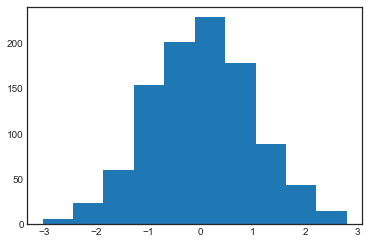

In [3]:
plt.hist(data);

The `hist()` function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

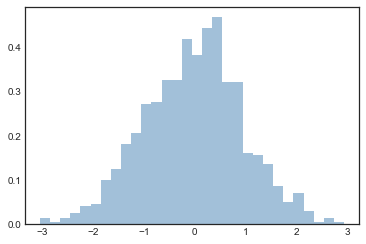

In [29]:
plt.hist(data, density=True, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

I find this combination of `histtype='stepfilled` along with some transparency `alpha` to be very useful when comparing histograms of serveral distributions

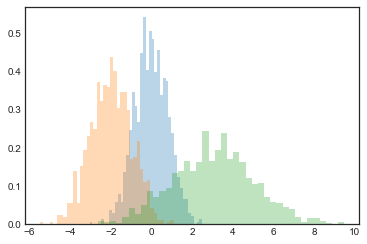

In [32]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the `np.histogram()` function is available:

In [35]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 29 231 470 235  35]


In [36]:
bin_edges

array([-3.03926981, -1.84531921, -0.65136861,  0.54258198,  1.73653258,
        2.93048318])